#Evaluating various model performances using metrics accuracy, precision, recall and f1-score using MLFlow

In [40]:
import pandas as pd
data_path = r"data\trials.csv"
df = pd.read_csv(data_path)
df.head()

,nctid,description,label
0,NCT02464748,MND is often referred to as amyotrophic latera...,ALS
1,NCT00362362,OBJECTIVE:||The causes of sporadic motor neuro...,ALS
2,NCT03154450,Non-invasive ventilation (NIV) use in patients...,ALS
3,NCT03487263,The objectives of this study are to determine:...,ALS
4,NCT04454892,"With the development of supportive measures, t...",ALS


In [7]:
df.describe()

,nctid,description,label
count,1759,1759,1759
unique,1759,1752,5
top,NCT01766674,In this study our purpose is to evaluate the s...,ALS
freq,1,3,368


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1759 entries, 0 to 1758
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nctid        1759 non-null   object
 1   description  1759 non-null   object
 2   label        1759 non-null   object
dtypes: object(3)
memory usage: 41.4+ KB


In [9]:
df.label.value_counts()

label
ALS                              368
Dementia                         368
Obsessive Compulsive Disorder    358
Scoliosis                        335
Parkinson’s Disease              330
Name: count, dtype: int64

In [10]:
df.shape

(1759, 3)

In [ ]:

#Preprocessing/Cleaning
import re
# Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_description'] = df['description'].apply(clean_text)

In [12]:
df['clean_description'].head()

0    mnd is often referred to as amyotrophic latera...
1    objectivethe causes of sporadic motor neuron d...
2    noninvasive ventilation niv use in patients wi...
3    the objectives of this study are to determinet...
4    with the development of supportive measures th...
Name: clean_description, dtype: object

In [23]:
#check the length of the description column
df['description_length'] = df['clean_description'].apply(lambda x: len(str(x).split()))

df['description_length'].head()

0     14
1    397
2    323
3    159
4    128
Name: description_length, dtype: int64

In [24]:
df.head()

,nctid,description,label,clean_description,description_length
0,NCT02464748,MND is often referred to as amyotrophic latera...,ALS,mnd is often referred to as amyotrophic latera...,14
1,NCT00362362,OBJECTIVE:||The causes of sporadic motor neuro...,ALS,objectivethe causes of sporadic motor neuron d...,397
2,NCT03154450,Non-invasive ventilation (NIV) use in patients...,ALS,noninvasive ventilation niv use in patients wi...,323
3,NCT03487263,The objectives of this study are to determine:...,ALS,the objectives of this study are to determinet...,159
4,NCT04454892,"With the development of supportive measures, t...",ALS,with the development of supportive measures th...,128


In [25]:
df['description_length'].describe() #summary statistics

count    1759.000000
mean      289.876066
std       303.843952
min         2.000000
25%       108.000000
50%       203.000000
75%       348.500000
max      3234.000000
Name: description_length, dtype: float64

#Plotting distribution of description length

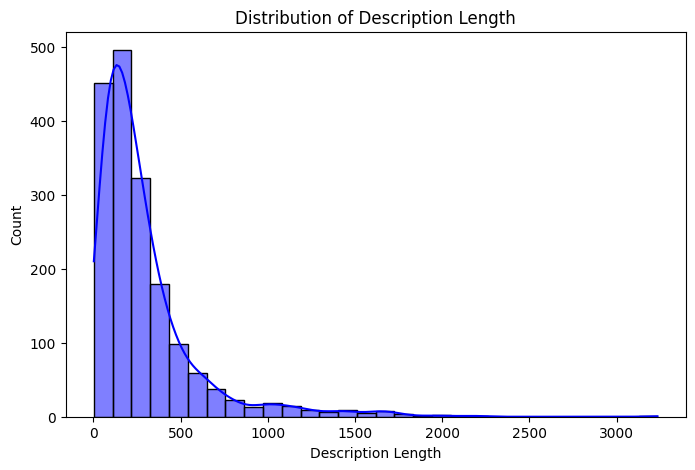

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['description_length'], bins=30, color='blue', kde=True)
plt.title("Distribution of Description Length")
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.show()

In [ ]:
MAX_SEQUENCE_LENGTH = 500
#Truncating the description length to 500
def truncate(text, max_length=MAX_SEQUENCE_LENGTH):
    words = text.split()
    if len(words) > max_length:
        text = " ". join(words[:max_length])
    return text

df['clean_description'] = df['clean_description'].apply(truncate)

In [31]:
#check the length of the description column
df['description_length'] = df['clean_description'].apply(lambda x: len(str(x).split()))

df['description_length'].head()

0     14
1    397
2    323
3    159
4    128
Name: description_length, dtype: int64

In [33]:
df['description_length'].describe()

count    1759.000000
mean      236.128482
std       153.164004
min         2.000000
25%       108.000000
50%       203.000000
75%       348.500000
max       500.000000
Name: description_length, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split

X = df['clean_description']
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# TF-IDF + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1, 2), stop_words='english')),
    ('clf', LogisticRegression())
])

In [49]:
import joblib

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

print("Accuracy", accuracy)

# Save model
# joblib.dump(pipeline, "lr_model.pkl")

Accuracy 0.9119318181818182


In [ ]:
# TF-IDF + Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

import joblib

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

print("Accuracy", accuracy)
print("classification_report:\n", cls_report)

#Save model
# joblib.dump(pipeline, "lr_model.pkl")

Accuracy 0.9204545454545454
classification_report:
                                precision    recall  f1-score   support

                          ALS       0.86      0.92      0.89        73
                     Dementia       0.96      0.96      0.96        67
Obsessive Compulsive Disorder       0.94      0.95      0.94        79
          Parkinson’s Disease       0.91      0.91      0.91        66
                    Scoliosis       0.95      0.87      0.91        67

                     accuracy                           0.92       352
                    macro avg       0.92      0.92      0.92       352
                 weighted avg       0.92      0.92      0.92       352



Analyzing the model parameters to find the best model using GridSearch

In [ ]:
#Grid Search for finding the best model parameters
#Grid Search for Logistic Regression
from sklearn.model_selection import  GridSearchCV


#Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200],
    'solver': ['liblinear', 'saga']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_tfidf)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best accuracy: ", accuracy_best)
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

Best parameters:  {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best accuracy:  0.9204545454545454
Best Model Classification Report:
                                precision    recall  f1-score   support

                          ALS       0.88      0.92      0.90        73
                     Dementia       0.97      0.96      0.96        67
Obsessive Compulsive Disorder       0.94      0.95      0.94        79
          Parkinson’s Disease       0.88      0.89      0.89        66
                    Scoliosis       0.94      0.88      0.91        67

                     accuracy                           0.92       352
                    macro avg       0.92      0.92      0.92       352
                 weighted avg       0.92      0.92      0.92       352



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
print("classification_report:\n", cls_report)

classification_report:
                                precision    recall  f1-score   support

                          ALS       0.92      0.86      0.89        78
                     Dementia       0.96      0.96      0.96        67
Obsessive Compulsive Disorder       0.95      0.94      0.94        80
          Parkinson’s Disease       0.91      0.91      0.91        66
                    Scoliosis       0.87      0.95      0.91        61

                     accuracy                           0.92       352
                    macro avg       0.92      0.92      0.92       352
                 weighted avg       0.92      0.92      0.92       352



In [ ]:
#Convert classification report string into a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

C:\Users\shabn\AppData\Local\Temp\ipykernel_19116\132285261.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y='precision', data=report_df, ax=axes[0], palette='Blues_d')
C:\Users\shabn\AppData\Local\Temp\ipykernel_19116\132285261.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y='recall', data=report_df, ax=axes[1], palette='Greens_d')
C:\Users\shabn\AppData\Local\Temp\ipykernel_19116\132285261.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y='f1-score', data=report_df, 

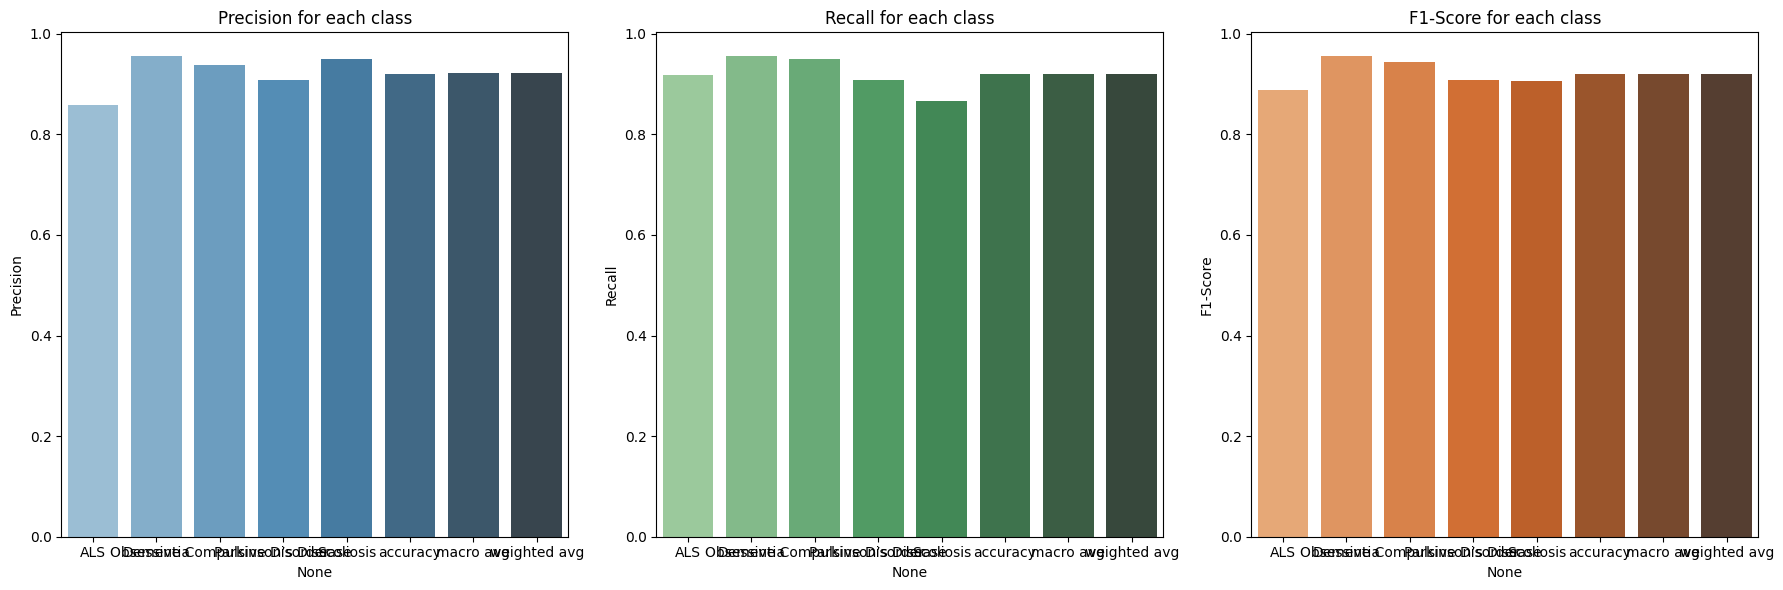

C:\Users\shabn\AppData\Local\Temp\ipykernel_19116\132285261.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y='support', data=report_df, palette='Purples_d')


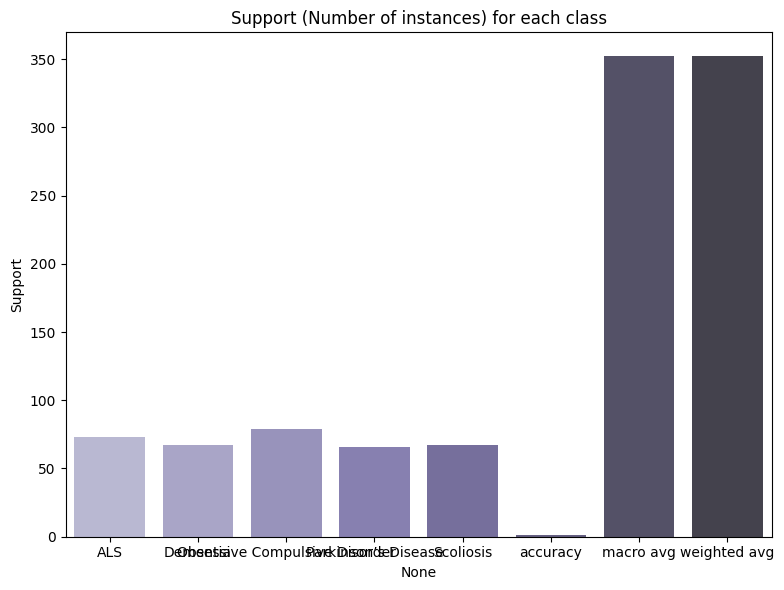

In [ ]:

#Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).T  # Transpose to have classes as rows

#Plot Precision, Recall, F1-Score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

#Plot Precision
sns.barplot(x=report_df.index, y='precision', data=report_df, ax=axes[0], palette='Blues_d')
axes[0].set_title('Precision for each class')
axes[0].set_ylabel('Precision')

#Plot Recall
sns.barplot(x=report_df.index, y='recall', data=report_df, ax=axes[1], palette='Greens_d')
axes[1].set_title('Recall for each class')
axes[1].set_ylabel('Recall')

#Plot F1-Score
sns.barplot(x=report_df.index, y='f1-score', data=report_df, ax=axes[2], palette='Oranges_d')
axes[2].set_title('F1-Score for each class')
axes[2].set_ylabel('F1-Score')

#Adjust layout
plt.tight_layout()
plt.show()

#Plot Support (number of instances for each class)
plt.figure(figsize=(8, 6))
sns.barplot(x=report_df.index, y='support', data=report_df, palette='Purples_d')
plt.title('Support (Number of instances) for each class')
plt.ylabel('Support')
plt.tight_layout()
plt.show()

In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X= df['clean_description']
X_tfidf = vectorizer.fit_transform(X)
y = df['label']
# Split data (assuming X_tfidf is your TF-IDF transformed text features)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(C=10, max_iter=100, solver='liblinear'),
    "SVM": SVC(kernel='linear', C=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


🔹 Logistic Regression Accuracy: 0.9290
                               precision    recall  f1-score   support

                          ALS       0.89      0.92      0.91        73
                     Dementia       0.98      0.96      0.97        67
Obsessive Compulsive Disorder       0.95      0.95      0.95        79
          Parkinson’s Disease       0.88      0.89      0.89        66
                    Scoliosis       0.94      0.93      0.93        67

                     accuracy                           0.93       352
                    macro avg       0.93      0.93      0.93       352
                 weighted avg       0.93      0.93      0.93       352

🔹 SVM Accuracy: 0.9205
                               precision    recall  f1-score   support

                          ALS       0.89      0.90      0.90        73
                     Dementia       0.98      0.96      0.97        67
Obsessive Compulsive Disorder       0.93      0.94      0.93        79
          P

In [57]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

bagging_model = BaggingClassifier(estimator=LogisticRegression(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("🔹 Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

🔹 Bagging Accuracy: 0.9176136363636364


In [58]:
from sklearn.ensemble import AdaBoostClassifier

boosting_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("🔹 Boosting Accuracy:", accuracy_score(y_test, y_pred_boosting))


🔹 Boosting Accuracy: 0.8806818181818182


In [59]:
from sklearn.ensemble import StackingClassifier

# Define base models
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=50)),
    ('gb', GradientBoostingClassifier(n_estimators=50))
]

# Meta-learner (final model)
meta_learner = LogisticRegression()

# Stacking classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print("🔹 Stacking Accuracy:", accuracy_score(y_test, y_pred_stacking))


🔹 Stacking Accuracy: 0.9289772727272727


In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("🔹 Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Parameters:", random_search.best_params_)


🔹 Best Random Forest Accuracy: 0.9261363636363636
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30}


In [61]:
pip install mlflow

  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyarrow-18.1.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached greenlet-3.1.1-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
  Using cached zipp-3.21.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.27.2-cp312-cp312-win_amd64.whl.metadata (6.7 kB)
   ---------------------------------------- 0.0/28.4 MB ? eta -:--:--
   -- ------------------------------------- 2.1/28.4 MB 11.7 MB/s eta 0:00:03
   -------- ------------------------------- 5.8/28.4 MB 14.1 MB/s eta 0:00:02
   ------------ --------------------------- 8.9/28.4 MB 15

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define models
models = {
    "Logistic Regression": LogisticRegression(C=10, solver="liblinear", max_iter=100),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVM": SVC(kernel="linear", C=1, probability=True)
}

# Set MLFlow experiment
mlflow.set_experiment("Model Selection")

# Train and log models
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cls_report = classification_report(y_test, y_pred, output_dict=True)

        # Log parameters, metrics, and model
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", report_dict["weighted avg"]["precision"])
        mlflow.log_metric("recall", report_dict["weighted avg"]["recall"])
        mlflow.log_metric("f1-score", report_dict["weighted avg"]["f1-score"])

        mlflow.sklearn.log_model(model, model_name)

        print(f"✅ {model_name} Accuracy: {acc:.4f}")
        print(cls_report)

print("🎯 Check MLflow UI with: `mlflow ui`")


2025/02/20 13:48:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logistic Regression Accuracy: 0.9290
{'ALS': {'precision': 0.8933333333333333, 'recall': 0.9178082191780822, 'f1-score': 0.9054054054054054, 'support': 73.0}, 'Dementia': {'precision': 0.9846153846153847, 'recall': 0.9552238805970149, 'f1-score': 0.9696969696969697, 'support': 67.0}, 'Obsessive Compulsive Disorder': {'precision': 0.9493670886075949, 'recall': 0.9493670886075949, 'f1-score': 0.9493670886075949, 'support': 79.0}, 'Parkinson’s Disease': {'precision': 0.8805970149253731, 'recall': 0.8939393939393939, 'f1-score': 0.8872180451127819, 'support': 66.0}, 'Scoliosis': {'precision': 0.9393939393939394, 'recall': 0.9253731343283582, 'f1-score': 0.9323308270676691, 'support': 67.0}, 'accuracy': 0.9289772727272727, 'macro avg': {'precision': 0.9294613521751252, 'recall': 0.9283423433300889, 'f1-score': 0.928803667178084, 'support': 352.0}, 'weighted avg': {'precision': 0.9296629574631612, 'recall': 0.9289772727272727, 'f1-score': 0.9292239998729233, 'support': 352.0}}


2025/02/20 13:48:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest Accuracy: 0.8636
{'ALS': {'precision': 0.8125, 'recall': 0.8904109589041096, 'f1-score': 0.8496732026143791, 'support': 73.0}, 'Dementia': {'precision': 0.6989247311827957, 'recall': 0.9701492537313433, 'f1-score': 0.8125, 'support': 67.0}, 'Obsessive Compulsive Disorder': {'precision': 0.9857142857142858, 'recall': 0.8734177215189873, 'f1-score': 0.9261744966442953, 'support': 79.0}, 'Parkinson’s Disease': {'precision': 0.9615384615384616, 'recall': 0.7575757575757576, 'f1-score': 0.847457627118644, 'support': 66.0}, 'Scoliosis': {'precision': 0.9649122807017544, 'recall': 0.8208955223880597, 'f1-score': 0.8870967741935484, 'support': 67.0}, 'accuracy': 0.8636363636363636, 'macro avg': {'precision': 0.8847179518274595, 'recall': 0.8624898428236516, 'f1-score': 0.8645804201141735, 'support': 352.0}, 'weighted avg': {'precision': 0.8867117807648633, 'recall': 0.8636363636363636, 'f1-score': 0.8664747621776911, 'support': 352.0}}


2025/02/20 13:49:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting Accuracy: 0.9062
{'ALS': {'precision': 0.9701492537313433, 'recall': 0.8904109589041096, 'f1-score': 0.9285714285714286, 'support': 73.0}, 'Dementia': {'precision': 0.96875, 'recall': 0.9253731343283582, 'f1-score': 0.9465648854961832, 'support': 67.0}, 'Obsessive Compulsive Disorder': {'precision': 0.7916666666666666, 'recall': 0.9620253164556962, 'f1-score': 0.8685714285714285, 'support': 79.0}, 'Parkinson’s Disease': {'precision': 0.9354838709677419, 'recall': 0.8787878787878788, 'f1-score': 0.90625, 'support': 66.0}, 'Scoliosis': {'precision': 0.9206349206349206, 'recall': 0.8656716417910447, 'f1-score': 0.8923076923076924, 'support': 67.0}, 'accuracy': 0.90625, 'macro avg': {'precision': 0.9173369424001345, 'recall': 0.9044537860534175, 'f1-score': 0.9084530869893467, 'support': 352.0}, 'weighted avg': {'precision': 0.9139013845325721, 'recall': 0.90625, 'f1-score': 0.9074426700446501, 'support': 352.0}}


2025/02/20 13:50:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ SVM Accuracy: 0.9205
{'ALS': {'precision': 0.8918918918918919, 'recall': 0.9041095890410958, 'f1-score': 0.8979591836734694, 'support': 73.0}, 'Dementia': {'precision': 0.9846153846153847, 'recall': 0.9552238805970149, 'f1-score': 0.9696969696969697, 'support': 67.0}, 'Obsessive Compulsive Disorder': {'precision': 0.925, 'recall': 0.9367088607594937, 'f1-score': 0.9308176100628931, 'support': 79.0}, 'Parkinson’s Disease': {'precision': 0.8611111111111112, 'recall': 0.9393939393939394, 'f1-score': 0.8985507246376812, 'support': 66.0}, 'Scoliosis': {'precision': 0.9508196721311475, 'recall': 0.8656716417910447, 'f1-score': 0.90625, 'support': 67.0}, 'accuracy': 0.9204545454545454, 'macro avg': {'precision': 0.9226876119499071, 'recall': 0.9202215823165177, 'f1-score': 0.9206548976142027, 'support': 352.0}, 'weighted avg': {'precision': 0.9224164495552813, 'recall': 0.9204545454545454, 'f1-score': 0.9206772909060107, 'support': 352.0}}
🎯 Check MLflow UI with: `mlflow ui`
